---
title: "Rock Decades Classification"
subtitle: "DSAN 5300 Final Project"
authors: ["Jorge Bris Moreno", "William McGloin", "Kangheng Liu", "Isfar Baset"]
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

# Decades

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
decades = pd.read_csv('../data/clean_data/balanced_rock_tracks.csv')

# what does that data look like? 
decades.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,key,mode,decade
0,0.544,0.812,-11.191,0.0592,0.51600,0.003100,0.1100,0.783,123.269,4,161186,9,1,1960s
1,0.652,0.693,-3.979,0.0359,0.66000,0.008090,0.3040,0.907,116.291,4,183613,8,0,1960s
2,0.429,0.234,-14.166,0.0717,0.81200,0.279000,0.1270,0.559,207.713,3,204466,9,1,1960s
3,0.507,0.327,-14.104,0.0315,0.20700,0.460000,0.0792,0.221,113.204,4,135850,5,1,1960s
4,0.504,0.678,-10.380,0.0367,0.00865,0.000000,0.0805,0.953,140.618,4,156946,2,1,1960s
5,0.563,0.323,-11.873,0.0654,0.68800,0.000445,0.2460,0.725,118.364,4,294573,4,1,1960s
6,0.806,0.521,-13.967,0.0783,0.25500,0.006750,0.0493,0.506,119.980,4,245466,9,1,1960s
7,0.386,0.335,-12.996,0.0344,0.64800,0.796000,0.8130,0.125,168.898,4,208587,7,1,1960s
8,0.663,0.785,-8.146,0.0270,0.62400,0.695000,0.0779,0.847,115.811,4,251746,0,1,1960s
9,0.297,0.327,-14.417,0.0482,0.67300,0.905000,0.0786,0.334,130.852,4,327986,9,1,1960s


## Classification Data Prep

In [3]:
# convert key and mode to factors
decades['key'] = decades['key'].astype('category')
decades['mode'] = decades['mode'].astype('category')

# rename mode to major
decades.rename(columns={'mode': 'major'}, inplace=True)

# what does the data look like now?
decades.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,key,major,decade
0,0.449,0.0426,-18.589,0.0441,0.981,0.000000,0.117,0.1670,119.857,5,456493,8,1,1950s
1,0.662,0.3220,-10.096,0.1790,0.834,0.000000,0.158,0.6660,84.471,4,118106,0,1,1950s
2,0.435,0.0901,-15.469,0.0582,0.809,0.000012,0.101,0.2210,178.850,3,378400,8,1,1950s
3,0.675,0.2760,-11.860,0.0412,0.765,0.000032,0.138,0.5680,141.739,4,231760,5,0,1950s
4,0.261,0.3090,-8.999,0.0371,0.718,0.000000,0.108,0.5820,182.124,3,177706,2,1,1950s
5,0.664,0.2070,-13.325,0.0525,0.817,0.000000,0.123,0.5140,85.423,4,251800,8,1,1950s
6,0.516,0.2780,-18.342,0.0551,0.883,0.599000,0.117,0.6050,128.756,4,375813,7,1,1950s
7,0.294,0.1850,-13.449,0.0301,0.940,0.000003,0.111,0.2440,78.714,5,204186,0,0,1950s
8,0.418,0.4570,-7.014,0.0541,0.772,0.000000,0.330,0.5960,150.898,4,162040,2,0,1950s
9,0.173,0.1720,-15.524,0.0353,0.927,0.000047,0.284,0.0852,86.790,4,203426,3,1,1950s


In [4]:
# find all numerical columns and normalize the numerical columns into a bracket from [0,1]
numerical_columns = decades.select_dtypes(include=[np.number]).columns
decades[numerical_columns] = (decades[numerical_columns] - decades[numerical_columns].min()) / (decades[numerical_columns].max() - decades[numerical_columns].min())

# what does the data look like now?
decades.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,key,major,decade
0,0.460986,0.042070,0.498757,0.045937,0.984940,0.000000,0.118063,0.169715,0.521240,1.0,0.095329,8,1,1950s
1,0.679671,0.322503,0.725800,0.186458,0.837349,0.000000,0.159435,0.676829,0.367351,0.8,0.023829,0,1,1950s
2,0.446612,0.089746,0.582164,0.060625,0.812249,0.000012,0.101917,0.224593,0.777791,0.6,0.078828,8,1,1950s
3,0.693018,0.276333,0.678643,0.042917,0.768072,0.000032,0.139253,0.577236,0.616401,0.8,0.047844,5,0,1950s
4,0.267967,0.309455,0.755126,0.038646,0.720883,0.000000,0.108981,0.591463,0.792029,0.6,0.036422,2,1,1950s
5,0.681725,0.207078,0.639479,0.054688,0.820281,0.000000,0.124117,0.522358,0.371492,0.8,0.052078,8,1,1950s
6,0.529774,0.278341,0.505360,0.057396,0.886546,0.603223,0.118063,0.614837,0.559940,0.8,0.078282,7,1,1950s
7,0.301848,0.184997,0.636164,0.031354,0.943775,0.000004,0.112008,0.247967,0.342315,1.0,0.042017,0,0,1950s
8,0.429158,0.458003,0.808191,0.056354,0.775100,0.000000,0.332997,0.605691,0.656232,0.8,0.033112,2,0,1950s
9,0.177618,0.171949,0.580693,0.036771,0.930723,0.000047,0.286579,0.086585,0.377436,0.8,0.041857,3,1,1950s


In [5]:
# split the data into training and testing sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(decades, test_size=0.2, random_state=37)

# split the data into features and target, target being three columns ['genre1','genre2','genre3']
X_train = train.drop(['decade'], axis=1)
y_train = train[['decade']]
X_test = test.drop(['decade'], axis=1)
y_test = test[['decade']]

print("Shape of X_train: ", X_train.shape, "\nShape of X_test: ", X_test.shape, "\nShape of y_train: ", y_train.shape, "\nShape of y_test: ", y_test.shape)

Shape of X_train:  (7417, 13) 
Shape of X_test:  (1855, 13) 
Shape of y_train:  (7417, 1) 
Shape of y_test:  (1855, 1)


In [6]:
# value counts of genre in the training data
y_train['decade'].value_counts()

decade
2000s    945
2010s    942
1960s    937
2020s    928
1970s    924
1950s    922
1990s    916
1980s    903
Name: count, dtype: int64

In [7]:
# value counts of genre in test data
y_test['decade'].value_counts()

decade
1980s    256
1990s    243
1950s    237
1970s    235
2020s    231
1960s    222
2010s    217
2000s    214
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
train_target_encoded = label_encoder.fit_transform(y_train)
test_target_encoded = label_encoder.fit_transform(y_test)

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic Regression using OVR

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Flatten the target arrays to avoid DataConversionWarnings
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Adding the solver here for completeness
    'max_iter': [10000]  # Increase max_iter to avoid convergence warnings
}

# Initialize the Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr')

# Create GridSearchCV with the logistic regression estimator and the parameter grid
grid_search = GridSearchCV(log_reg_ovr, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train_flat)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test_flat, y_pred)
classification_report_result = classification_report(y_test_flat, y_pred)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Best Parameters: {'C': 78.47599703514607, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.34123989218328843
Classification Report:
              precision    recall  f1-score   support

       1950s       0.36      0.63      0.45       237
       1960s       0.34      0.38      0.36       222
       1970s       0.21      0.08      0.11       235
       1980s       0.38      0.48      0.42       256
       1990s       0.25      0.08      0.12       243
       2000s       0.30      0.43      0.36       214
       2010s       0.25      0.14      0.18       217
       2020s       0.42      0.51      0.46       231

    accuracy                           0.34      1855
   macro avg       0.31      0.34      0.31      1855
weighted avg       0.31      0.34      0.31      1855



Text(0.5, 1.0, 'Training Confusion Matrix')

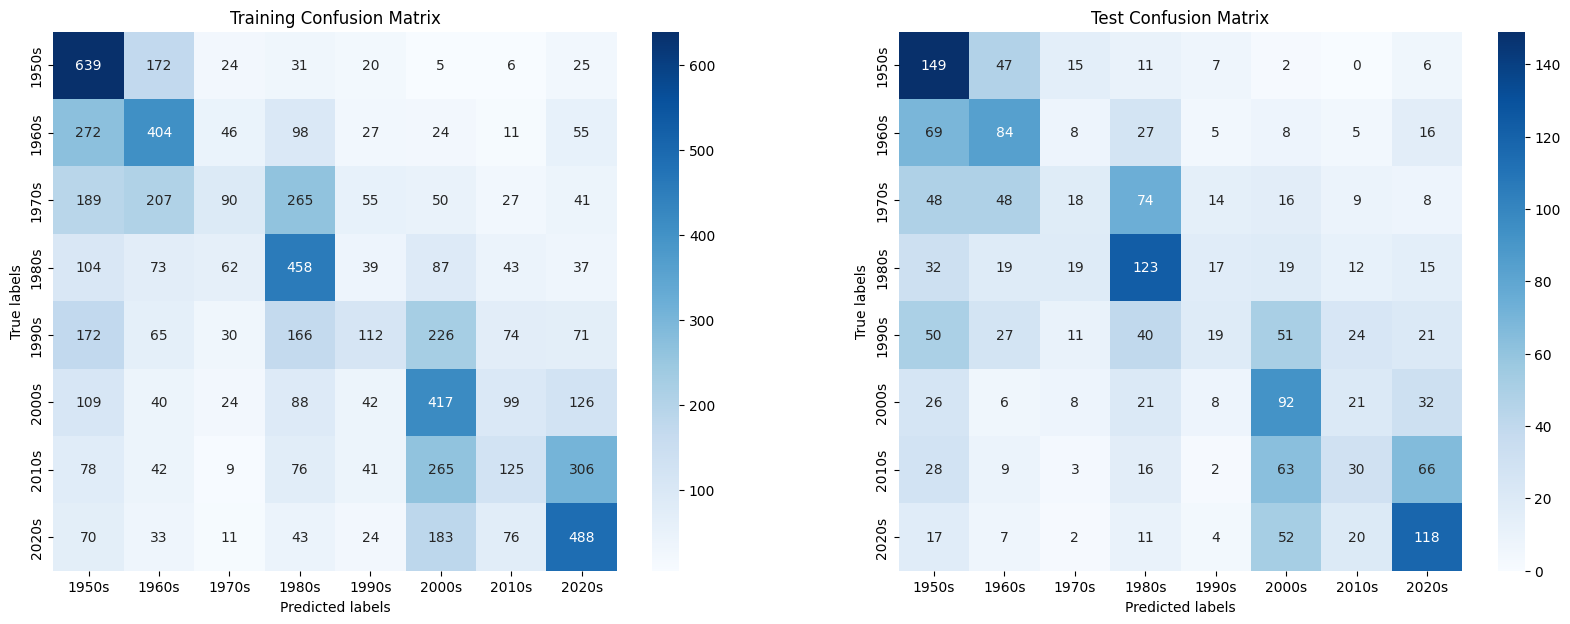

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_train = best_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## SVM

In [11]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added different kernels to try
    'gamma': ['scale', 'auto']  # Gamma is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
}

# Initialize the SVM model
svm_model = SVC(max_iter=10000, decision_function_shape='ovr')

# Create GridSearchCV with the SVM estimator and the parameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train_flat)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test data with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_svm = accuracy_score(y_test_flat, y_pred_svm)
classification_report_svm = classification_report(y_test_flat, y_pred_svm)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report_svm)

KeyboardInterrupt: 

Text(0.5, 1.0, 'Training Confusion Matrix')

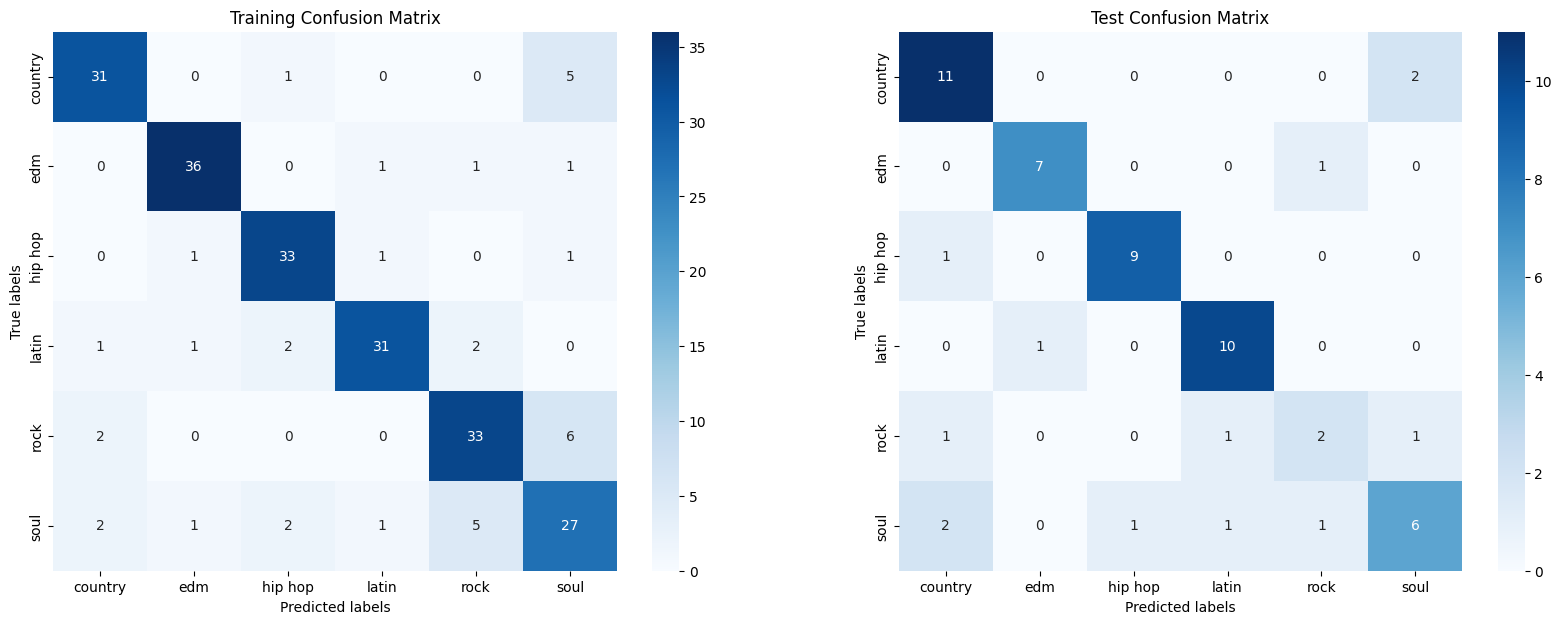

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_svm_train = best_svm_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_svm_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred_svm)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## Neural Network

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, dropout_rate=0.05, regularization_rate=0.01, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1, neurons=None, dropout_rate=None, regularization_rate=None, hidden_layers=None, batch_size=None, epochs=None)

param_grid = {
    'neurons': [64, 128, 256],
    'dropout_rate': [0.05, 0.1, 0.2],
    'regularization_rate': [0.01, 0.001],
    'hidden_layers': [1, 2, 3],
    'batch_size': [32, 64, 128],
    'epochs': [50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, train_target_encoded)


In [143]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.688502 using {'batch_size': 32, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


Best parameters found:  {'batch_size': 32, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


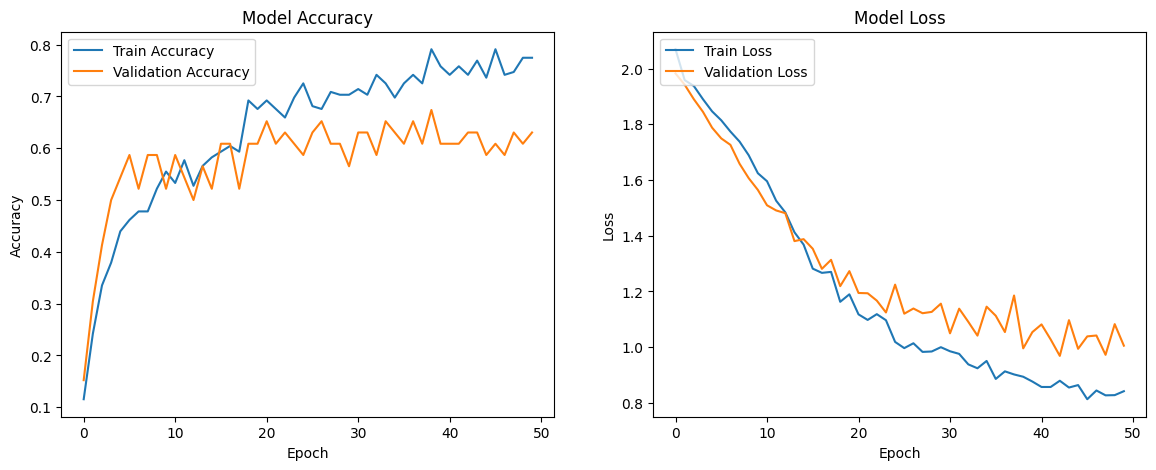

In [144]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

# Create a new model with the best parameters
best_model = create_model(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    regularization_rate=best_params['regularization_rate'],
    hidden_layers=best_params['hidden_layers']
)

# Train the best model
history = best_model.fit(
    X_train, 
    train_target_encoded, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'],
    validation_split=0.2,  # Use 20% of the data for validation
    verbose=0  # Turn off training log
)

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [145]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, test_target_encoded, verbose=0)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7068965435028076


## Random Forest

In [53]:
# Perform Random Forest Classification on the artist dataset
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the Random Forest estimator and the parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, train_target_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [58]:
from sklearn.metrics import accuracy_score

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test data with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_rf = accuracy_score(test_target_encoded, y_pred_rf)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.7931034482758621
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       1.00      0.75      0.86         8
           2       0.82      0.90      0.86        10
           3       0.90      0.82      0.86        11
           4       0.50      0.40      0.44         5
           5       0.80      0.73      0.76        11

    accuracy                           0.79        58
   macro avg       0.79      0.75      0.76        58
weighted avg       0.80      0.79      0.79        58



Text(0.5, 1.0, 'Training Confusion Matrix')

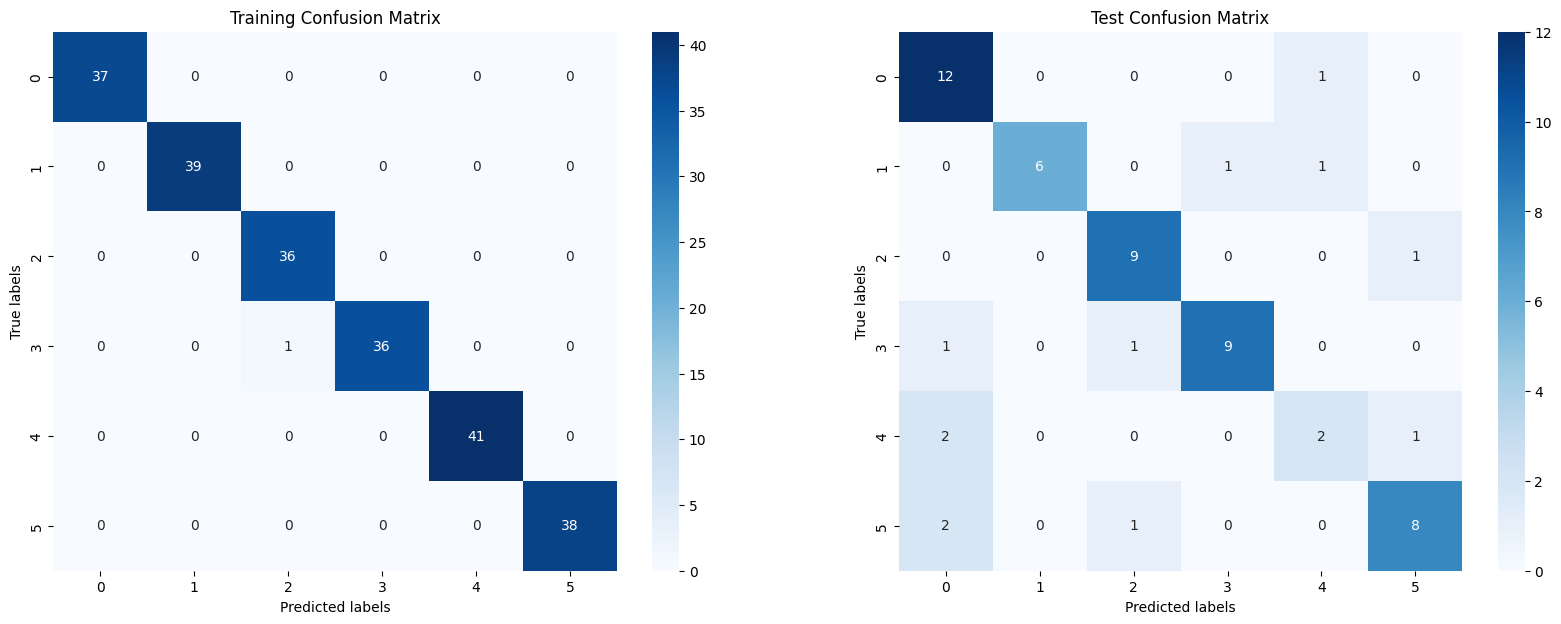

In [61]:
from sklearn.metrics import classification_report

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Test Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(test_target_encoded, y_pred_rf))

# draw confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# train confusion matrix
cm_train = confusion_matrix(train_target_encoded, grid_search_rf.predict(X_train))

# test confusion matrix
cm_test = confusion_matrix(test_target_encoded, y_pred_rf)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(test_target_encoded)), yticklabels=sorted(set(test_target_encoded)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(train_target_encoded)), yticklabels=sorted(set(train_target_encoded)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')


## XGBoost 

In [101]:
# Encode categorical 'genre' for both training and testing sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Change the key and major columns to numerical for input
X_train['key'] = X_train['key'].astype('int')
X_train['major'] = X_train['major'].astype('int')
X_test['key'] = X_test['key'].astype('int')
X_test['major'] = X_test['major'].astype('int')


In [102]:
import xgboost as xgb

# Setting up the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',  # Use for multi-class classification
    num_class=len(label_encoder.classes_),  # Specify number of classes
    random_state=137
)

# Training the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [104]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7068965517241379
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.83      0.62      0.71         8
           2       0.69      0.90      0.78        10
           3       0.75      0.55      0.63        11
           4       0.38      0.60      0.46         5
           5       0.78      0.64      0.70        11

    accuracy                           0.71        58
   macro avg       0.70      0.69      0.68        58
weighted avg       0.73      0.71      0.71        58



In [105]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Configuring the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Running grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_chil

In [106]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Making predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the results
print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_classification_report)


Test Set Accuracy: 0.7758620689655172
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.83      0.62      0.71         8
           2       0.82      0.90      0.86        10
           3       0.78      0.64      0.70        11
           4       0.67      0.80      0.73         5
           5       0.73      0.73      0.73        11

    accuracy                           0.78        58
   macro avg       0.77      0.77      0.76        58
weighted avg       0.78      0.78      0.77        58



## Comparison of the models (CHANGE AT END)

- Logistic Regression
    - Test Accuracy: 0.8103448275862069
    - Time: 3.2s
- SVM
    - Test Accuracy: 0.7758620689655172
    - Time: 3.4s
- Neural Network
    - Train Accuracy: 0.688502
    - Test Accuracy: 0.7068965435028076
    - Time: 11m 46.2.s
- Random Forest
    - Test Accuracy: 0.7931034482758621
    - Time: 1m 6.4s
- XGBoost
    - Test Accuracy: 0.7758620689655172
    - Time: 24.5s